In [ ]:
# Boxplot generation using lithologic algorithms [Python Porgramming Language] for Jaba Field, well 1. 
# To understand the data distribution, whether it is skewed or not, and whether any outliers are present. 
# The "minimum", 1st Quartile (25th percentile), median (2nd Quartile./ 50th Percentile), 
#    the 3rd Quartile (75th percentile) and the "maximum". The minimum and maximum values 
#    are defined as Q1 - 1.5 IQR and Q3 + 1.5 IQR respectively. Any points that fall outside 
#    of these limits are referred to as outliers.
# Modified: 23/10/2021
# Created by: Fisayo Fagbemi

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import lasio

In [3]:
las = lasio.read("Well_A.las")

In [40]:
#pip install lasio

In [4]:
df = las.df()
df.describe()

,RHOB,DT:1,DT:2,LLD,GR
count,9778.000000,9793.000000,9806.000000,9791.000000,8637.000000
mean,2.257625,100.908346,104.355664,100.905400,62.192282
std,0.145989,11.910640,447.387043,11.906195,27.883760
min,1.656100,56.235400,0.790300,56.254800,4.790300
25%,2.156425,92.353600,2.274725,92.354950,38.343800
50%,2.241600,99.431700,6.123750,99.431500,59.883100
75%,2.364800,108.217300,17.965950,108.218000,87.391700
max,2.674300,146.176800,4244.920000,146.176000,155.457500


In [6]:
# Remove all non values 
df.dropna(inplace=True)

In [7]:
df

,RHOB,DT:1,DT:2,LLD,GR
DEPT,,,,,
5494.5,2.4009,126.4180,2.4055,126.4180,96.8155
5495.0,2.3917,127.4803,2.4055,127.4790,96.6951
5495.5,2.3910,127.1361,2.4055,127.1360,98.2764
5496.0,2.4050,126.7721,2.4055,126.7720,98.9957
5496.5,2.4224,124.6475,2.4621,124.6490,96.8353
...,...,...,...,...,...
9810.5,2.3416,81.4473,4.0220,81.4481,63.8442
9811.0,2.3266,80.7391,4.6938,80.7390,64.7001
9811.5,2.3023,81.2360,4.9979,81.2360,65.4930


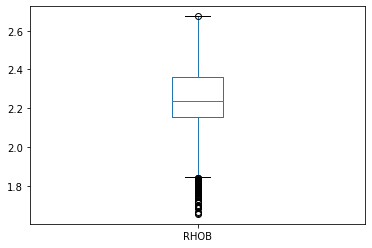

In [9]:
#Simple boxplot using pandas
df['RHOB'].plot(kind='box');

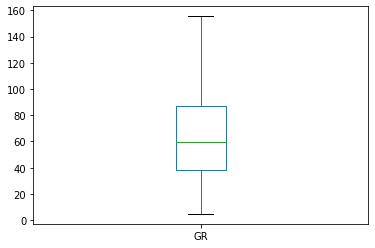

In [10]:
#Simple boxplot using pandas
df['GR'].plot(kind='box');

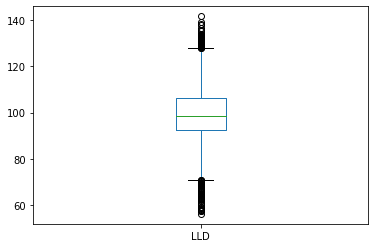

In [11]:
df['LLD'].plot(kind='box');

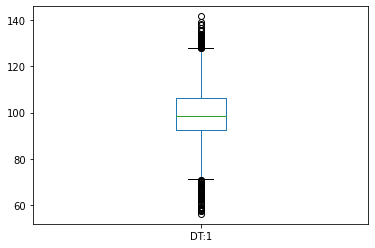

In [16]:
df['DT:1'].plot(kind='box');

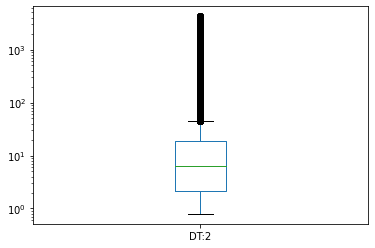

In [14]:
df['DT:2'].plot(kind='box');
plt.semilogy();

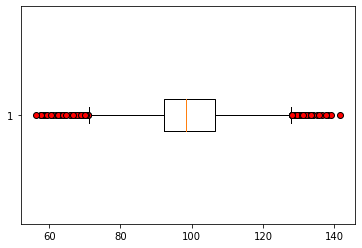

In [19]:
#Changing the outlier markers
red_circle = dict(markerfacecolor='red', marker='o')
plt.boxplot(x=df['LLD'], vert=False, flierprops=red_circle);

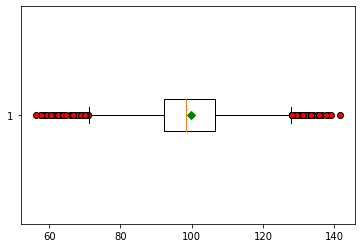

In [20]:
red_circle = dict(markerfacecolor='red', marker='o')
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green')

plt.boxplot(x=df['LLD'], vert=False, flierprops=red_circle, 
             showmeans=True, meanprops=mean_shape);

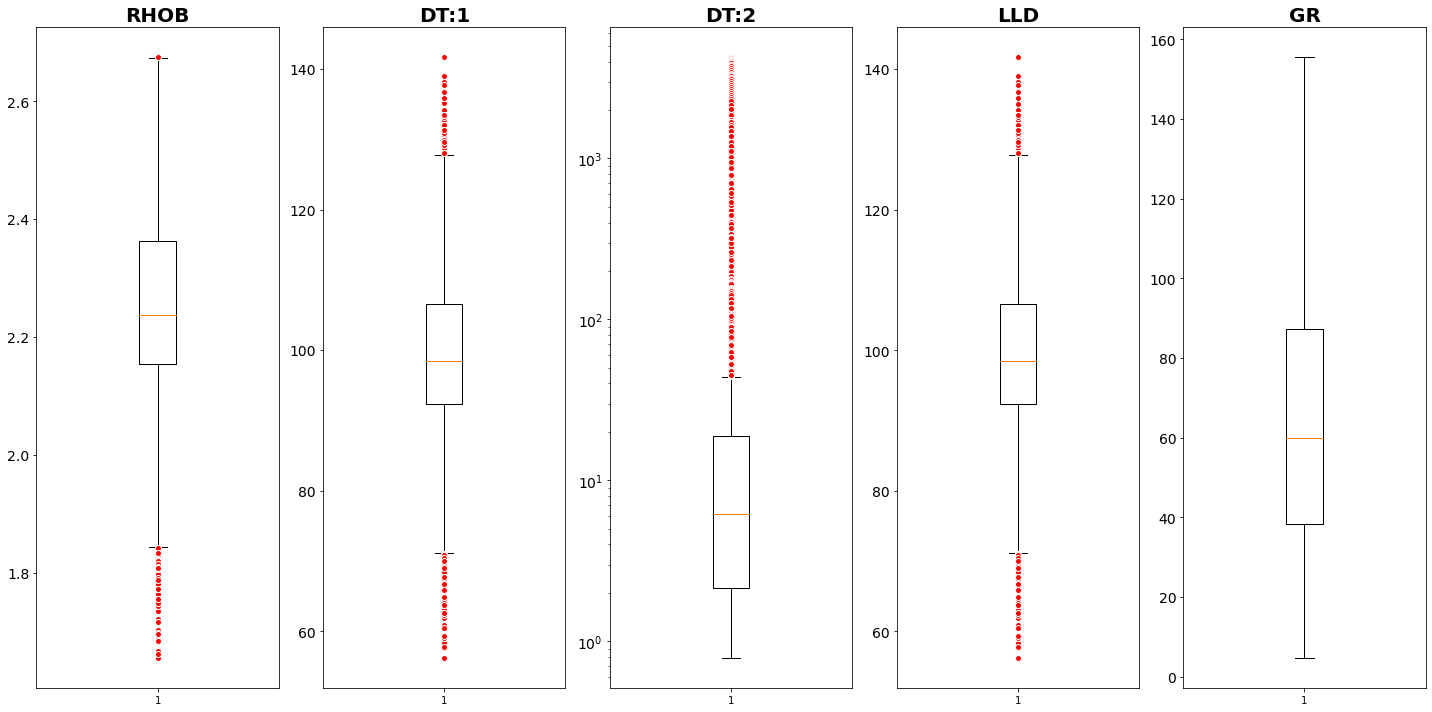

In [22]:
#Creating subplot of each column with its own scale
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(1, len(df.columns), figsize=(20,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df.iloc[:,i], flierprops=red_circle)
    ax.set_title(df.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
    
    #Checking if column names are equal to columns we expect to be logarithmic
    if df.columns[i] == 'DT:2':
        ax.semilogy()
        
plt.tight_layout()

In [41]:
#pip install plotly

In [42]:
# Plotly Imports
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [43]:
df = lasio.read('Well_B.las').df()

In [44]:
df.reset_index(inplace=True)

In [45]:
df.head()

,DEPT,CAL,DT,RHOB,VSH,LLD,NPHI,GR
0,4901.0,NaN,NaN,1.5551,NaN,NaN,NaN,NaN
1,4901.5,NaN,NaN,1.5553,NaN,NaN,NaN,NaN
2,4902.0,NaN,NaN,1.5812,NaN,NaN,NaN,NaN
3,4902.5,NaN,NaN,1.6205,NaN,NaN,NaN,NaN
4,4903.0,NaN,NaN,1.6645,NaN,NaN,NaN,NaN


In [46]:
df.describe()

,DEPT,CAL,DT,RHOB,VSH,LLD,NPHI,GR
count,6181.000000,4701.000000,5765.000000,5099.000000,4627.000000,5783.000000,3842.000000,5645.000000
mean,6446.000000,10.684091,106.711312,2.041632,0.309673,49.124654,0.260560,65.092757
std,892.222669,0.915736,10.073077,0.141557,0.339908,141.442633,0.085487,28.709408
min,4901.000000,9.550000,67.548700,1.520200,0.000200,1.179300,0.000000,9.241500
25%,5673.500000,10.010900,99.836200,1.963300,0.000200,5.339550,0.250825,41.184200
50%,6446.000000,10.416300,106.094100,2.062100,0.191700,11.639700,0.290500,57.968800
75%,7218.500000,11.030500,113.223700,2.131900,0.551950,27.088400,0.320000,92.088000
max,7991.000000,13.831900,158.498200,2.457300,1.000000,1206.168900,0.320000,177.044900


In [47]:
fig = go.Figure(data=go.Scatter(x=df['DEPT'], y=df['GR']))
fig.update_layout(xaxis_title='DEPTH', yaxis_title='GR')
fig.show()

In [48]:
fig = px.line(df, x='DEPT', y='GR')
fig.show()

In [49]:
fig = px.line(df, x='DEPT', y='GR', 
              range_y=[0, 150], 
              range_x=[4000,4900])
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [51]:
fig = make_subplots(rows=1, cols=3, shared_yaxes=True)
fig.add_trace(go.Scatter(x=df['GR'], y=df['DEPT'], fill='tozerox', fillcolor='green'), row=1, col=1)
fig.add_trace(go.Scatter(x=df['RHOB'], y=df['DEPT']), row=1, col=2)
fig.add_trace(go.Scatter(x=df['LLD'], y=df['DEPT']), row=1, col=3)

fig.update_xaxes(title_text="GR", row=1, col=1)
fig.update_xaxes(title_text="RHOB", row=1, col=2)
fig.update_xaxes(title_text="LLD", row=1, col=3)


fig.update_yaxes(title_text="Depth", row=1, col=1, autorange='reversed')

fig.update_layout(title_text="Interactive Plot", height=900)

fig.show()